In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks")

In [2]:
diamonds=pd.read_csv('Diamonds Prices2022.csv')

In [3]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    diamonds[var] = diamonds[var].astype(ordered_var)

In [5]:
print(diamonds.describe())

         Unnamed: 0         carat         depth         table         price  \
count  53943.000000  53943.000000  53943.000000  53943.000000  53943.000000   
mean   26972.000000      0.797935     61.749322     57.457251   3932.734294   
std    15572.147122      0.473999      1.432626      2.234549   3989.338447   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13486.500000      0.400000     61.000000     56.000000    950.000000   
50%    26972.000000      0.700000     61.800000     57.000000   2401.000000   
75%    40457.500000      1.040000     62.500000     59.000000   5324.000000   
max    53943.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53943.000000  53943.000000  53943.000000  
mean       5.731158      5.734526      3.538730  
std        1.121730      1.142103      0.705679  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

In [6]:
sns.set_theme(color_codes=True)

diamond = sns.load_dataset("diamonds")

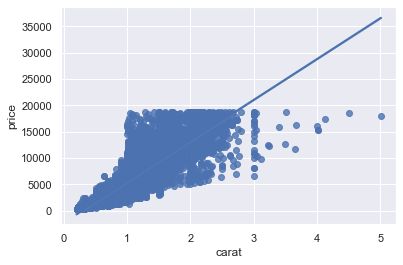

In [7]:
sns.regplot(x="carat", y="price", data=diamonds);

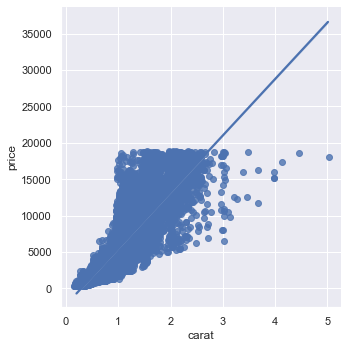

In [8]:
sns.lmplot(x="carat", y="price", data=diamonds, x_jitter=.05)

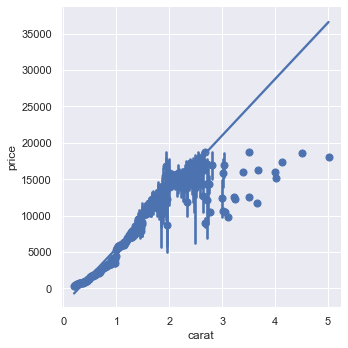

In [9]:
sns.lmplot(x="carat", y="price", data=diamonds, x_estimator=np.mean, x_jitter=.05)

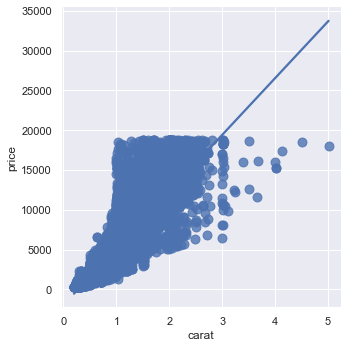

In [10]:
sns.lmplot(x="carat", y="price", data=diamonds,
           robust=True, ci=None, scatter_kws={"s":80});

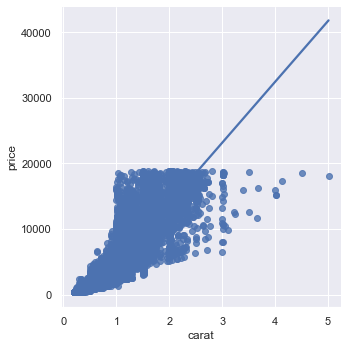

In [11]:
sns.lmplot(x="carat", y="price", data=diamonds,
          lowess= True)

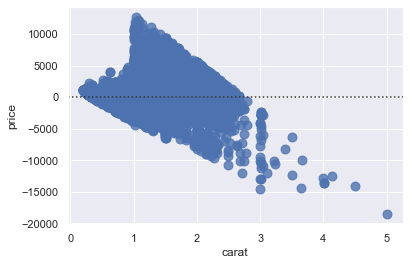

In [12]:
sns.residplot(x="carat", y="price", data=diamonds,
              scatter_kws={"s": 80});

In [13]:
#### residual suggest that simple lineaer regression is not appropriate!

In [14]:
diamonds.loc[diamonds['cut'] == "Ideal"]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,12,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,14,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,17,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,40,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78
...,...,...,...,...,...,...,...,...,...,...,...
53925,53926,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67
53926,53927,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54
53929,53930,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50


In [15]:
ideal_cuts=diamonds.loc[diamonds['cut'] == "Ideal"]

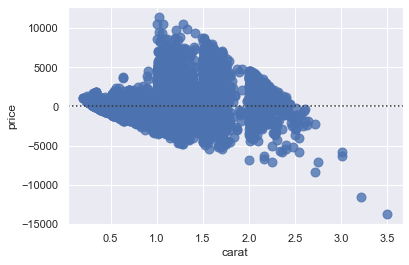

In [16]:
sns.residplot(x="carat", y="price", data=ideal_cuts,
              scatter_kws={"s": 80});

In [17]:
premium_cuts =diamonds.loc[diamonds['cut'] == "Premium"]

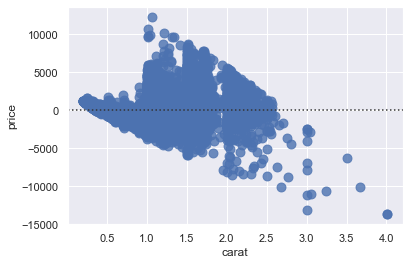

In [18]:
sns.residplot(x="carat", y="price", data=premium_cuts,
              scatter_kws={"s": 80});

In [19]:
very_good_cuts = diamonds.loc[diamonds['cut'] == "Very Good"]

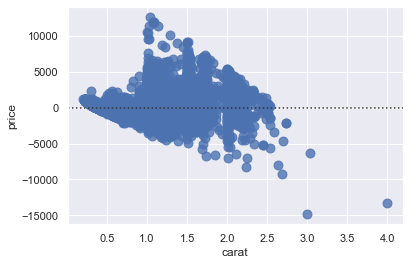

In [20]:
sns.residplot(x="carat", y="price", data=very_good_cuts,
              scatter_kws={"s": 80});

In [21]:
good_cuts = diamonds.loc[diamonds['cut'] == "Good"]

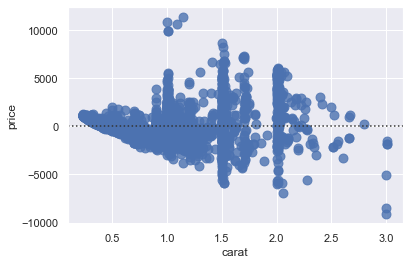

In [22]:
sns.residplot(x="carat", y="price", data=good_cuts,
              scatter_kws={"s": 80});

In [23]:
fair_cuts = diamonds.loc[diamonds['cut'] == "Fair"]

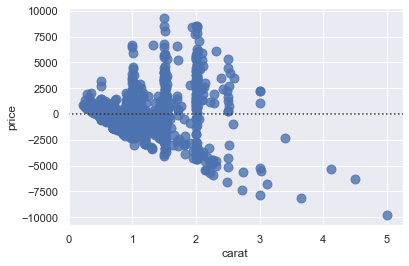

In [24]:
sns.residplot(x="carat", y="price", data=fair_cuts,
              scatter_kws={"s": 80});

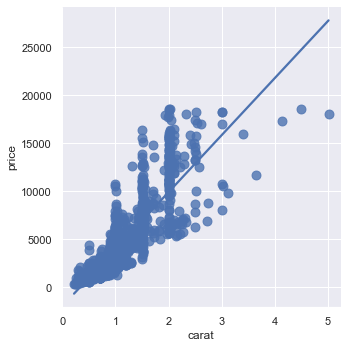

In [25]:
sns.lmplot(x="carat", y="price", data=fair_cuts,
           robust=True, ci=None, scatter_kws={"s": 80});

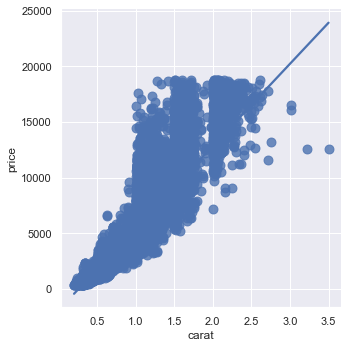

In [26]:
sns.lmplot(x="carat", y="price", data=ideal_cuts,
           robust=True, ci=None, scatter_kws={"s": 80});


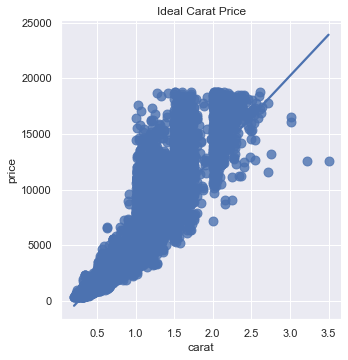

In [27]:
ideal_fig= sns.lmplot(x="carat", y="price", data=ideal_cuts,
           robust=True, ci=None, scatter_kws={"s": 80}).set(title='Ideal Carat Price');

In [28]:
ideal_fig.savefig("Ideal_fig.png") 

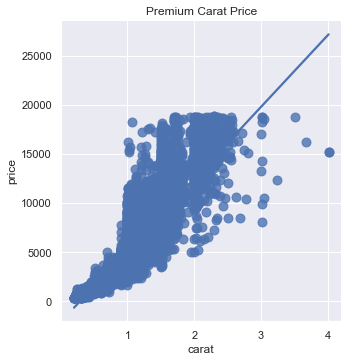

In [29]:
premium_fig= sns.lmplot(x="carat", y="price", data=premium_cuts,
           robust=True, ci=None, scatter_kws={"s": 80}).set(title='Premium Carat Price');

In [30]:
premium_fig.savefig("Premium_cut.png")

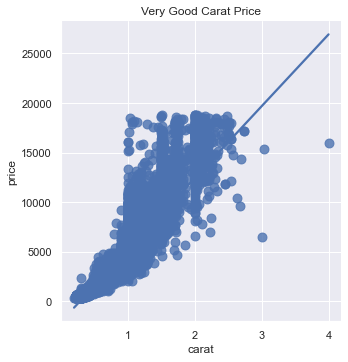

In [31]:
very_good_fig= sns.lmplot(x="carat", y="price", data=very_good_cuts,
           robust=True, ci=None, scatter_kws={"s": 80}).set(title='Very Good Carat Price');

In [32]:
very_good_fig.savefig("very_good_fig.png")

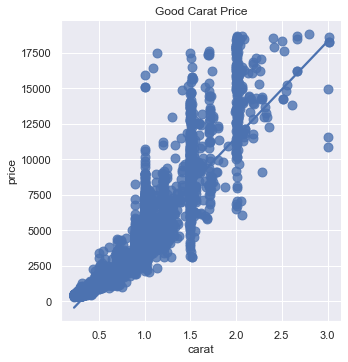

In [33]:
good_fig= sns.lmplot(x="carat", y="price", data=good_cuts,
           robust=True, ci=None, scatter_kws={"s": 80}).set(title='Good Carat Price');

In [34]:
good_fig.savefig("good_fig.png")

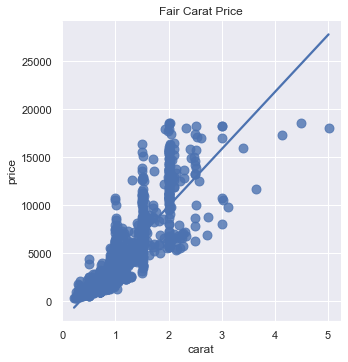

In [35]:
fair_fig= sns.lmplot(x="carat", y="price", data=fair_cuts,
           robust=True, ci=None, scatter_kws={"s": 80}).set(title='Fair Carat Price');

In [36]:
fair_fig.savefig("fair_fig.png")

In [37]:
fair_cuts_describe = fair_cuts.describe()

In [38]:
fair_cuts_describe.to_csv('fair_cuts_describe.csv')

In [39]:
good_cuts_describe = good_cuts.describe()
good_cuts_describe.to_csv('good_cuts_describe.csv')

In [40]:
very_good_cuts_describe = good_cuts.describe()
very_good_cuts_describe.to_csv('very_good_cuts_describe.csv')

In [41]:
premium_cuts_describe = good_cuts.describe()
premium_cuts_describe.to_csv('premium_cuts_describe.csv')

In [42]:
ideal_cuts_describe = good_cuts.describe()
ideal_cuts_describe.to_csv('ideal_cuts_describe.csv')

In [65]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt

mpl.style.use('ggplot')

print ('matplotlib version', mpl.__version__)

matplotlib version 3.5.1


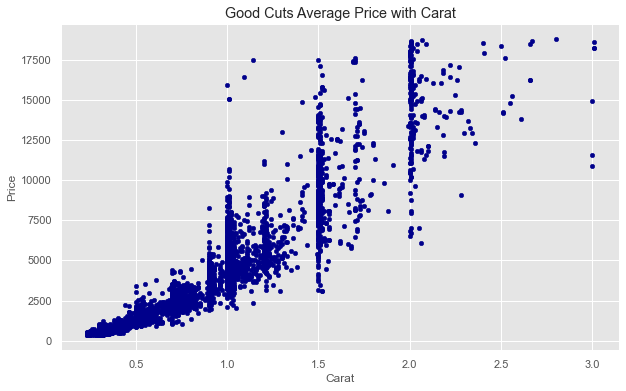

In [46]:
good_cuts.plot(kind = 'scatter' , x = 'carat', y = 'price', figsize = (10,6), color = 'darkblue')

plt.title ('Good Cuts Average Price with Carat')
plt.xlabel('Carat')
plt.ylabel('Price')

plt.show()

In [52]:
good_cuts_500 = good_cuts.head(500)

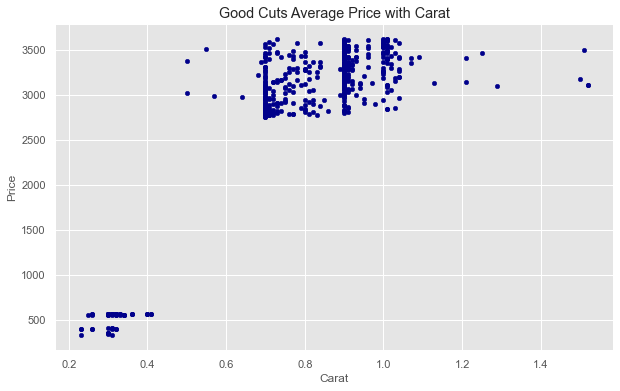

In [61]:
good_cuts_500.plot(kind = 'scatter' , x = 'carat', y = 'price', figsize = (10,6), color = 'darkblue')

plt.title ('Good Cuts Average Price with Carat')
plt.xlabel('Carat')
plt.ylabel('Price')

plt.show()

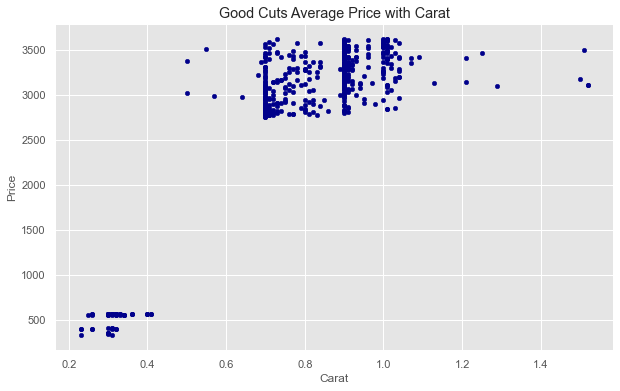

In [62]:
good_cuts_500_fig = good_cuts_500.plot(kind = 'scatter' , x = 'carat', y = 'price', figsize = (10,6), color = 'darkblue')

plt.title ('Good Cuts Average Price with Carat')
plt.xlabel('Carat')
plt.ylabel('Price')

plt.show()

In [68]:
good_cuts_500_fig.figure.savefig("good_cuts_500.png")

print ('saved figure!')

saved figure!
